In [1]:
import numpy as np
import pandas as pd 
import pickle
import random
import matplotlib.pyplot as plt

In [ ]:
#different models:
#1: Input:  propellers dimensions and one specific advanced ratio
#   Output: optimalized dimensions for better efiiciency

#2: Input:  propellers dimensions and torque coefficient
#   Output: optimalized dimensions for better efiiciency

In [26]:
input_keys = ['B', 'D', 'P', 'J', 'N', 'c/R', 'r/R', 'beta']
output_keys = ['CT', 'CP', 'eta']

In [27]:
# Read model
filename = "model_J.sav"
loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
data_name = 'full_data.csv'
df = pd.read_csv(data_name)

In [29]:
random_prop_name = random.choice(df['PropName'])
df = df[df['PropName'] == random_prop_name]

In [30]:
df

,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta,c/R,r/R,beta
207306,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.30592,2026.0,0.115462,0.081379,0.434046,0.1201,0.15,43.597
207307,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.30592,2026.0,0.115462,0.081379,0.434046,0.1458,0.20,44.647
207308,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.30592,2026.0,0.115462,0.081379,0.434046,0.2626,0.25,40.856
207309,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.30592,2026.0,0.115462,0.081379,0.434046,0.3494,0.30,38.623
207310,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.30592,2026.0,0.115462,0.081379,0.434046,0.3712,0.35,35.889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208723,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.00000,5700.0,0.145621,0.081547,0.000000,0.1597,0.80,19.090
208724,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.00000,5700.0,0.145621,0.081547,0.000000,0.1326,0.85,18.222
208725,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.00000,5700.0,0.145621,0.081547,0.000000,0.1040,0.90,17.376
208726,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.00000,5700.0,0.145621,0.081547,0.000000,0.0740,0.95,16.810


In [31]:
random_rpm = random.choice(list(df['N']))

In [32]:
df_rpm = df[df['N'] == random_rpm]

In [33]:
df_rpm

,PropName,BladeName,Family,B,D,P,J,N,CT,CP,eta,c/R,r/R,beta
207648,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.150911,4042.0,0.139737,0.078992,0.266960,0.1201,0.15,43.597
207649,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.150911,4042.0,0.139737,0.078992,0.266960,0.1458,0.20,44.647
207650,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.150911,4042.0,0.139737,0.078992,0.266960,0.2626,0.25,40.856
207651,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.150911,4042.0,0.139737,0.078992,0.266960,0.3494,0.30,38.623
207652,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.150911,4042.0,0.139737,0.078992,0.266960,0.3712,0.35,35.889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207949,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.788524,4042.0,-0.009589,0.006742,-1.121825,0.1597,0.80,19.090
207950,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.788524,4042.0,-0.009589,0.006742,-1.121825,0.1326,0.85,18.222
207951,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.788524,4042.0,-0.009589,0.006742,-1.121825,0.1040,0.90,17.376
207952,da4052 9.0x6.75 - 3,da4052 9.0x6.75,da4052,3,9.0,6.75,0.788524,4042.0,-0.009589,0.006742,-1.121825,0.0740,0.95,16.810


In [34]:
J_list = df_rpm['J'].unique()

In [36]:
J_list

array([0.150911, 0.19143 , 0.2309  , 0.271599, 0.310235, 0.35029 ,
       0.388893, 0.427882, 0.468012, 0.507297, 0.549221, 0.587882,
       0.627359, 0.668732, 0.70612 , 0.747867, 0.788524])

In [35]:
for j in J_list:
    print(f"parameters for J: {j}:\n{df_rpm[df_rpm['J'] == j]}")

parameters for J: 0.150911:
                   PropName        BladeName  Family  B    D     P         J  \
207648  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207649  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207650  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207651  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207652  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207653  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207654  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207655  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207656  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207657  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207658  da4052 9.0x6.75 - 3  da4052 9.0x6.75  da4052  3  9.0  6.75  0.150911   
207659  da40

In [15]:
df_rpm['beta'].unique()

array([43.027, 38.667, 31.785, 27.7  , 24.24 , 21.321, 18.927, 17.068,
       15.54 , 13.922, 12.574, 11.751, 11.026, 10.262,  9.633,  9.162,
        8.329,  6.787])

In [44]:
dimensions = df_rpm[input_keys]
J_const =  0.549221
dimensions = dimensions[dimensions['J']== J_const]
dimensions = dimensions.drop(['J'], axis=1)
dimensions

,B,D,P,N,c/R,r/R,beta
207828,3,9.0,6.75,4042.0,0.1201,0.15,43.597
207829,3,9.0,6.75,4042.0,0.1458,0.20,44.647
207830,3,9.0,6.75,4042.0,0.2626,0.25,40.856
207831,3,9.0,6.75,4042.0,0.3494,0.30,38.623
207832,3,9.0,6.75,4042.0,0.3712,0.35,35.889
207833,3,9.0,6.75,4042.0,0.3644,0.40,32.831
207834,3,9.0,6.75,4042.0,0.3487,0.45,30.158
207835,3,9.0,6.75,4042.0,0.3267,0.50,28.126
207836,3,9.0,6.75,4042.0,0.2974,0.55,26.423
207837,3,9.0,6.75,4042.0,0.2645,0.60,24.606


In [45]:
# We could change 'c/R' (adimensional chord) and 'beta' (angle relative to rotation)

In [17]:
y_pred = loaded_model.predict(df_rpm[input_keys].values)
adv = df_rpm['J']

In [18]:
y_pred[0]

array([0.045336, 0.029925, 0.349929])

In [19]:
y_true = df_rpm[output_keys].values

In [20]:
y_true

array([[ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.045336,  0.029925,  0.349929],
       [ 0.035402,  0.026685,  0.386409],
       [ 0.035402,  0.026685,  0.386409],
       [ 0.035402,  0.026685,  0.386409],
       [ 0.035402,  0.026685,  0.386409],
       [ 0.035402,  0.026685,  0.386409],
       [ 0.035402,  0.026685,  0.3

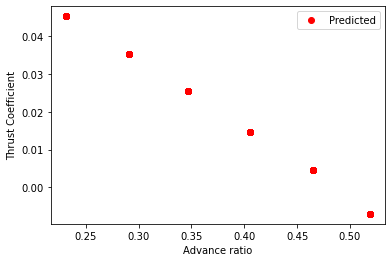

In [24]:
# Plotting
plt.plot(adv, y_pred[:,0], 'or', label='Predicted')
# plt.plot(adv, y_true[:,0], 'og', label='Actual')
plt.xlabel("Advance ratio")
plt.ylabel("Thrust Coefficient")
plt.legend()
plt.show()

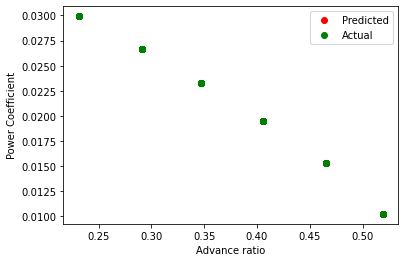

In [22]:
plt.plot(adv, y_pred[:,1], 'or', label='Predicted')
plt.plot(adv, y_true[:,1], 'og', label='Actual')
plt.xlabel("Advance ratio")
plt.ylabel("Power Coefficient")
plt.legend()
plt.show()

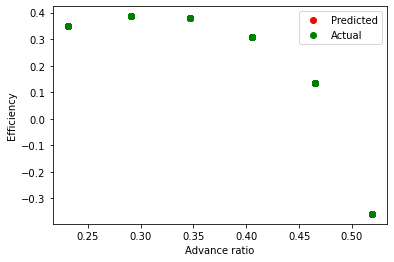

In [23]:
plt.plot(adv, y_pred[:,2], 'or', label='Predicted')
plt.plot(adv, y_true[:,2], 'og', label='Actual')
plt.xlabel("Advance ratio")
plt.ylabel("Efficiency")
plt.legend()
plt.show()